# Classification - Question 14
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

First, we will import the necessary libraries and the dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 

%matplotlib inline

In [79]:
Auto = pd.read_csv('Auto.csv')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### (a) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` method of the data frame. Note you may find it helpful to add a column `mpg01` to the data frame by assignment. Assuming you have stored the data frame as `Auto`, this can be done as follows:

`Auto['mpg01'] = mpg01`

In [80]:
mpg01 = np.where(Auto['mpg'] > Auto['mpg'].median(), 1, 0)
Auto['mpg01'] = mpg01

Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


#### (b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your fndings.

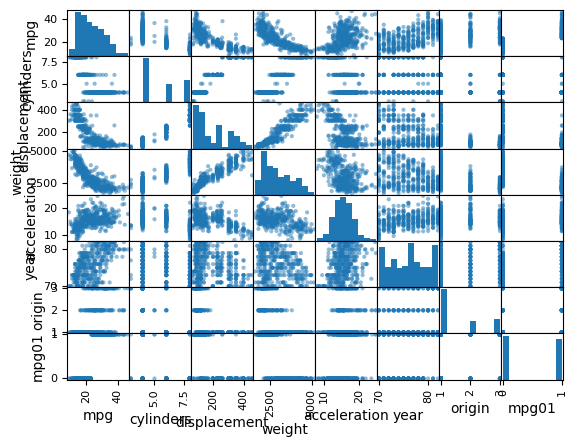

In [82]:
pd.plotting.scatter_matrix(Auto)
plt.show()

In [91]:
Auto[['cylinders', 'displacement', 'weight', 'year', 'origin', 'acceleration', 'mpg01']].corr()

,cylinders,displacement,weight,year,origin,acceleration,mpg01
cylinders,1.000000,0.950920,0.897017,-0.346717,-0.564972,-0.504061,-0.740327
displacement,0.950920,1.000000,0.933104,-0.369804,-0.610664,-0.544162,-0.738607
weight,0.897017,0.933104,1.000000,-0.307900,-0.581265,-0.419502,-0.745734
year,-0.346717,-0.369804,-0.307900,1.000000,0.184314,0.282901,0.454108
origin,-0.564972,-0.610664,-0.581265,0.184314,1.000000,0.210084,0.511393
acceleration,-0.504061,-0.544162,-0.419502,0.282901,0.210084,1.000000,0.322629
mpg01,-0.740327,-0.738607,-0.745734,0.454108,0.511393,0.322629,1.000000


From the scatter matrix and correlation matrix of the dataset, we can conclude that `cylinders`, `displacement`, and `weight` are strongly correlated to `mpg01`, and thus, should most likely be useful in predicting `mpg01`

#### (c) Split the data into a training set and a test set

In [123]:
x = Auto[['cylinders', 'displacement', 'weight']].values
y = Auto['mpg01'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

#### (d)  Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [105]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

test_error = 1 - accuracy_score(y_test, lda.predict(x_test))
test_error

0.16000000000000003

The test error of the LDA model on the training data is about 0.16

#### (e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [106]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

test_error = 1 - accuracy_score(y_test, qda.predict(x_test))
test_error

0.12

The test error of the QDA model on the training data is about 0.12

#### (f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [107]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

test_error = 1 - accuracy_score(y_test, lr.predict(x_test))
test_error

0.16000000000000003

The test error of the Logistic Regression model on the training data is about 0.16

#### (g) Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [108]:
nb = GaussianNB()
nb.fit(x_train, y_train)

test_error = 1 - accuracy_score(y_test, nb.predict(x_test))
test_error

0.14

The test error of the Naive Bayes model on the training data is about 0.14

#### (h)  Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [133]:
for K in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train, y_train)
    
    test_error = 1 - accuracy_score(y_test, knn.predict(x_test))
    print('For K=', K, ', the test error is ', test_error)

For K= 1 , the test error is  0.14
For K= 2 , the test error is  0.16000000000000003
For K= 3 , the test error is  0.13
For K= 4 , the test error is  0.17000000000000004
For K= 5 , the test error is  0.14
For K= 6 , the test error is  0.15000000000000002
For K= 7 , the test error is  0.15000000000000002
For K= 8 , the test error is  0.16000000000000003
For K= 9 , the test error is  0.16000000000000003
For K= 10 , the test error is  0.15000000000000002
For K= 11 , the test error is  0.16000000000000003
For K= 12 , the test error is  0.15000000000000002
For K= 13 , the test error is  0.16000000000000003
For K= 14 , the test error is  0.16000000000000003
For K= 15 , the test error is  0.16000000000000003
For K= 16 , the test error is  0.15000000000000002
For K= 17 , the test error is  0.16000000000000003
For K= 18 , the test error is  0.16000000000000003
For K= 19 , the test error is  0.16000000000000003
For K= 20 , the test error is  0.15000000000000002
For K= 21 , the test error is  0.1

The value of K which seems to perform the best on the dataset is K=3, as the test error is the lowest for this value.